# 3.5编程实现线性判别分析，并给出西瓜数据集3.0 $\alpha$上的结果

In [38]:
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [39]:
def getDataSet():
    """
    get watermelon dataset 3.0 alpha. 
    :return: (feature array, label array)
    """
    dataSet = np.array([
        [0.697, 0.460, 1],
        [0.774, 0.376, 1],
        [0.634, 0.264, 1],
        [0.608, 0.318, 1],
        [0.556, 0.215, 1],
        [0.403, 0.237, 1],
        [0.481, 0.149, 1],
        [0.437, 0.211, 1],
        [0.666, 0.091, 0],
        [0.243, 0.267, 0],
        [0.245, 0.057, 0],
        [0.343, 0.099, 0],
        [0.639, 0.161, 0],
        [0.657, 0.198, 0],
        [0.360, 0.370, 0],
        [0.593, 0.042, 0],
        [0.719, 0.103, 0]
    ])
    
    # insert number 1 before column 0.
    # e.g: dataSet[0]=[1, 0.697, 0.460, 1]
    #dataSet = np.insert(dataSet, 0, np.ones(dataSet.shape[0]),axis=1)
    
    dataArr=dataSet[:,:-1]
    labelArr=dataSet[:,-1]
    return dataArr,labelArr

## linear Discriminant Analysis

In [40]:
def LDA(dataArr,labelArr):
    """
    Linear Discriminant Analysis.
    :param dataArr: 
    :param labelArr: 
    :return: parameter w
    """
    # classify the data
    data1=dataArr[labelArr==1]
    data0=dataArr[labelArr==0]
    
    # compute mu
    mu0=data0.mean(axis=0,keepdims=True)
    mu1=data1.mean(axis=0,keepdims=True)
    
    # compute cov of the data0,1
    diff0=data0-mu0
    diff1=data1-mu1
    cov0=np.dot(diff0.T,diff0)
    cov1=np.dot(diff1.T,diff1)
    
    # compute the within-class scatter matrix
    Sw=cov0+cov1
    
    # compute the parameter w
    Swinv=np.linalg.inv(Sw)
    w=np.dot(Swinv,mu0.T-mu1.T)
    
    return w

## Main Function

In [41]:
def main():
    """
    main function.
    get the parameter
    plot the figure
    """
    dataArr,labelArr=getDataSet()
    w=LDA(dataArr,labelArr)
    print(w)
    
    # plot data points
    data1=dataArr[labelArr==1]
    data0=dataArr[labelArr==0]
    plt.scatter(data1[:,0],data1[:,1],label="class 1")
    plt.scatter(data0[:,0],data0[:,1],label="class 0")
    plt.xlabel("x1")
    plt.ylabel("x2")
    # plot the line(decision line is perpendicular to w)
    w=w.flatten()
    maxX1=dataArr[:,0].max()
    minX1=dataArr[:,0].min()
    x1=np.linspace(maxX1-1,minX1+1,102)
    x2=-w[0]*x1/w[1]
    #plt.plot(x1,w[1]*x1/w[0],label="w direction")
    plt.plot(x1,x2,label="LDA decision line")
    
    plt.legend()
    plt.show()

[[-0.14650982]
 [-0.73871557]]


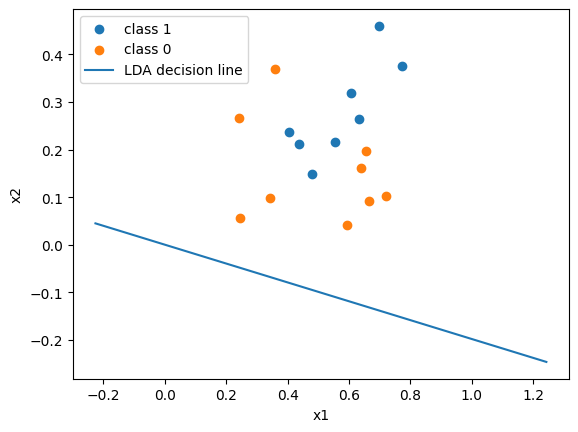

In [42]:
if __name__=="__main__":
    main()

ps:由于数据是线性不可分的，故线性判别分析效果很差，我们可以考虑使用kernel核方法来实现KLDA，从而达到非线性可分